In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import scipy as sc
from scipy.optimize import minimize
from sklearn.datasets import make_regression
import tensorflow as tf

Generating and Importing dataframe

In [2]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import sklearn.datasets as dt

rng = np.random.RandomState(1)
X = rng.rand(1000, 10)
Y = np.dot(X, [1.5, -2., 1.0,-0.5, 0.09, -1, 0, 0.4,-0.9, -3])

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1) # Generating train and test dataset

min_val_x = X.min()
max_val_x = X.max()

min_val_y = Y.min()
max_val_y = Y.max()

X_train = (X_train - min_val_x) / (max_val_x - min_val_x)
X_test = (X_test - min_val_x) / (max_val_x - min_val_x)

#Y_train = (Y_train - min_val_y) / (max_val_y - min_val_y)
#Y_test = (Y_test - min_val_y) / (max_val_y - min_val_y)

Lasso regression using scikit-learn library

C:\Users\patel\AppData\Local\Temp\ipykernel_17092\3014750429.py:23: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model_lasso.fit(X_train,Y_train)    # training the model
e:\Lectures\Arbeit\Sensorics\sens\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


   r2_score  intercept     NRMSE         0         1         2         3  \
0  0.999999        0.0  0.000793  1.501104 -1.998645  1.000028 -0.500169   
1  0.999932        0.0  0.008264  1.485969 -1.988248  0.985747 -0.488111   
2  0.993554        0.0  0.080289  1.360258 -1.889456  0.853338 -0.390660   
3  0.708176        0.0  0.540207  0.000000 -1.279042  0.000000 -0.000000   
4 -1.624159        0.0  1.619926 -0.000000 -0.039634 -0.000000 -0.000000   

          4         5         6         7         8         9  lamda  
0  0.088658 -1.001483 -0.001349  0.399520 -0.899493 -2.998436  0.000  
1  0.077306 -0.989003  0.000000  0.384485 -0.888371 -2.989497  0.001  
2  0.000000 -0.896860  0.000000  0.242408 -0.787987 -2.900891  0.010  
3 -0.000000 -0.359022 -0.000000 -0.000000 -0.237547 -2.401652  0.100  
4 -0.000000 -0.000000 -0.000000 -0.000000 -0.000000 -1.184709  1.000  


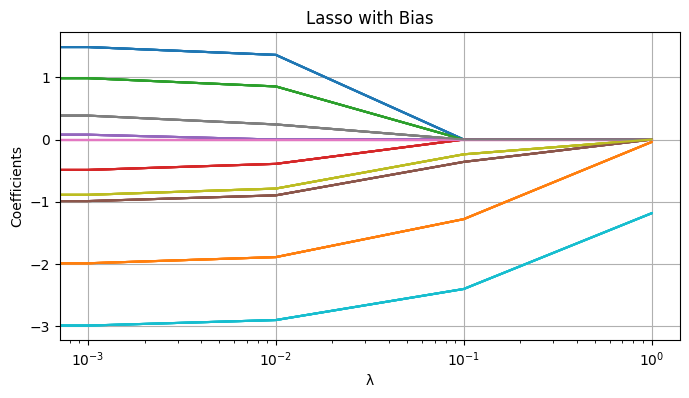

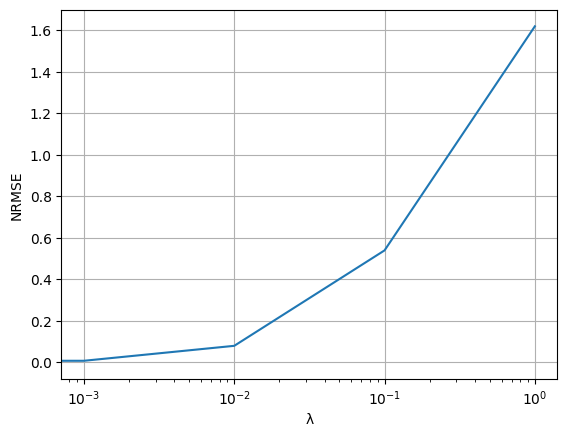

In [5]:
from sklearn.linear_model import Lasso
from importlib import reload
plt = reload(plt)

lamda = [0,0.001,0.01,0.1,1]   # an array with differnet values of tuning parameter

cf_lasso = []   # array of co-efficients for different lamda
r2_scores_lasso = []    # array of r2 scores for different lamda
intercept=[]    # array of biases for different lamda
NRMSE_s = []

def NRMSE(y,ym):
        # y: Process output, ym: Model output or predictions
        error = np.zeros(len(y))

        for i in range(len(y)):
            error[i] = (y[i]-ym[i])**2
            
        return np.sqrt(np.mean((error)/np.char.chararray.var(y)))

for i in lamda:
    model_lasso = Lasso(alpha = i,fit_intercept=False,max_iter=10000)
    model_lasso.fit(X_train,Y_train)    # training the model

    cf_lasso.append(model_lasso.coef_.tolist())
    intercept.append(model_lasso.intercept_)
    ym_lasso = model_lasso.predict(X_test)  # Generating model output
    r2_scores_lasso.append(r2_score(Y_test,ym_lasso))
    NRMSE_s.append(NRMSE(Y_test,ym_lasso))

# Genarating daframe with lamdas, r2_score, bias and co-efficients
df_lasso = pd.DataFrame(cf_lasso)
df_lasso['lamda'] = lamda
df_lasso.set_index('lamda')
df_lasso.insert(loc=0,column= 'r2_score',value=r2_scores_lasso)
df_lasso.insert(loc=1,column= 'intercept',value=intercept)
df_lasso.insert(loc=2,column= 'NRMSE',value=NRMSE_s)

print(df_lasso.head())

# Plotting diffenent values of lamda vs co-efficients
nwl,_ = np.array(cf_lasso).shape
plt.figure(figsize = (8,4))

for i in range(nwl):
    plt.plot(lamda, cf_lasso)

plt.xlabel('\u03BB')
plt.xscale('log')
plt.ylabel('Coefficients')
plt.title('Lasso with Bias')
plt.axis('tight')
plt.grid()
plt.show()

plt.plot(lamda,NRMSE_s)
plt.xscale('log')
plt.xlabel('\u03BB')
plt.ylabel('NRMSE')
plt.axis('tight')
plt.grid()
plt.show()


LARS

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLars

cf_lars = []
NRMSE_lars = []


for i in lamda:
    reg = LassoLars(alpha = i,max_iter=10000,eps=1e-8)
    reg.fit(X_train,Y_train)    # training the model

    cf_lars.append(reg.coef_path_)
    #intercept.append(model_lasso.intercept_)
    ym_lars = reg.predict(X_test)  # Generating model output
    #r2_scores_lasso.append(r2_score(Y_test,ym_lasso))
    NRMSE_lars.append(NRMSE(Y_test,ym_lars))

e:\Lectures\Arbeit\Sensorics\sens\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
e:\Lectures\Arbeit\Sensorics\sens\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardS

In [10]:
print(NRMSE_lars)
print(NRMSE_s)

[1.453238673999951e-15, 0.06629631112580034, 0.557545988498999, 1.006064298354615, 1.006064298354615]
[0.0007926293851143435, 0.008263950628422194, 0.08028867162745255, 0.5402070176024398, 1.6199256960774082]


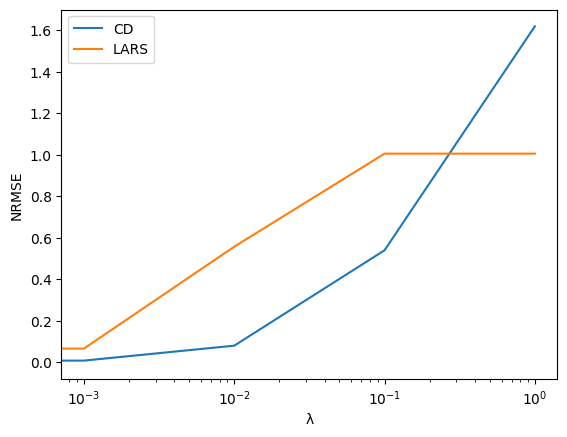

In [12]:
plt.plot(lamda,NRMSE_s,label='CD')
plt.plot(lamda,NRMSE_lars,label='LARS')
plt.xscale("log")
#plt.yscale("log")
plt.xlabel('\u03BB')
plt.ylabel('NRMSE')
plt.legend()
plt.show()

Creating class Coordinate Descent without Bias

In [4]:
import copy

class CoordinateDescentLassoWithoutBias():
    def __init__(self, alpha, epoch= 10000,tol = 1e-4):
        self.alpha = alpha  
        self.epoch = epoch 
        self.tol = tol 
        self.coef = None
        self.para = None 

    def soft_threshold(self,rho,lamda):
        if rho < - lamda:
            return rho + lamda
        elif rho > lamda:
            return rho - lamda
        else: 
            return 0
    
    def fit(self, X, y):
        m,n = X.shape
        beta = np.zeros(n) 
        para = []      

        for iteration in range(self.epoch):
            beta_old = np.copy(beta)
            
            for j in range(n):
                beta[j] = 0.0
                error = y - np.dot(X, beta)
                rho = np.dot(X[:, j], error)
                lamda = self.alpha*m

                beta[j] = self.soft_threshold( rho, lamda) / (X[:, j]**2).sum() 
                para.append(copy.deepcopy(beta))   

            if np.linalg.norm(beta - beta_old) < self.tol:
                print("Optimization converged after", iteration+1, "iterations")
                break       
    
        self.coef = beta
        self.para = para
        return self

    def predict(self, X):        
        y = np.dot(X, self.coef)        
        return y
    
    def NRMSE(self,y,ym):
        # y: Process output, ym: Model output or predictions
        error = np.zeros(len(y))

        for i in range(len(y)):
            error[i] = (y[i]-ym[i])**2
            
        return np.sqrt(np.mean((error)/np.char.chararray.var(y)))


Implementation of Coordinate Descent without Bias

Optimization converged after 95 iterations
Optimization converged after 90 iterations
Optimization converged after 57 iterations
Optimization converged after 31 iterations
Optimization converged after 1 iterations
      NRMSE  r2_score         0         1         2         3         4  \
0  0.905300  0.180431  0.354480 -0.115096  0.313457  0.091106  0.158576   
1  0.907375  0.176670  0.349094 -0.096645  0.306395  0.085835  0.154326   
2  0.989546  0.020798  0.304742  0.000000  0.251293  0.036802  0.115959   
3  1.450721 -1.104592  0.221354  0.000000  0.135743  0.000000  0.062193   
4  2.838808 -7.058829  0.000000  0.000000  0.000000  0.000000  0.000000   

          5         6         7         8         9  lamda  
0  0.007423  0.181860  0.234795  0.038258 -0.299703  0.000  
1  0.001797  0.177780  0.230426  0.033877 -0.281408  0.001  
2  0.000000  0.145051  0.187964  0.000000 -0.111621  0.010  
3  0.000000  0.076243  0.091521  0.000000  0.000000  0.100  
4  0.000000  0.000000  0.00000

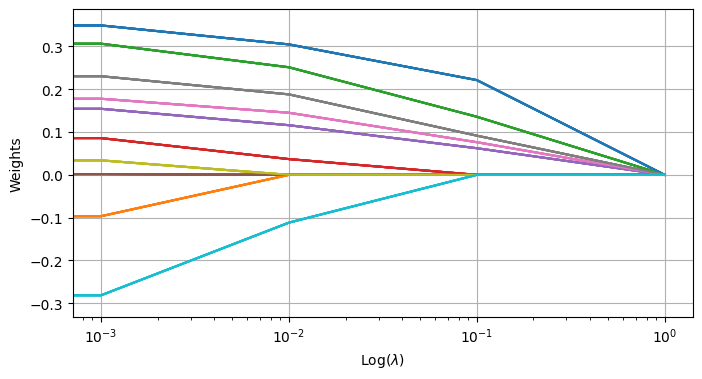

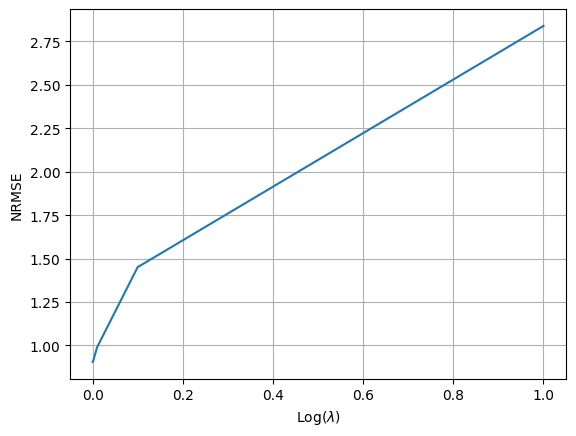

In [5]:
w_wo = []
r2_scores_wo= []
NRMSE_wo = []

for i in lamda:
    model = CoordinateDescentLassoWithoutBias(i)
    model.fit(X_train,Y_train)
    
    w_wo.append(model.coef)
    ym_wo = model.predict(X_test)
    r2_scores_wo.append(r2_score(Y_test,ym_wo))
    NRMSE_wo.append(model.NRMSE(Y_test,ym_wo)) 

df_wo = pd.DataFrame(w_wo)
df_wo.insert(loc=0,column= 'r2_score',value=r2_scores_wo)
df_wo.insert(loc=0,column= 'NRMSE',value=NRMSE_wo)
df_wo['lamda'] = lamda
df_wo.set_index('lamda')

print(df_wo.head())

nwo,_ = np.array(w_wo).shape
plt.figure(figsize = (8,4))

for i in range(nwo):
    plt.plot(lamda, w_wo)

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Weights')
plt.axis('tight')
plt.grid()
plt.show()

plt.plot(lamda,NRMSE_wo)
plt.xlabel('Log($\\lambda$)')
plt.ylabel('NRMSE')
plt.axis('tight')
plt.grid()
plt.show()


In [18]:
lasso = CoordinateDescentLassoWithoutBias(0.01,epoch=10000)
lasso.fit(X_train,Y_train)
    
w_o = lasso.coef
y_o = lasso.predict(X_test)
r2_scores_wo = r2_score(Y_test,y_o)
NRMSE_wo = lasso.NRMSE(Y_test,y_o)

Optimization converged after 57 iterations


In [7]:
print(w_o)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Gradient descnet 

In [31]:
init_slope = np.ones(10)

def run_gradient_descent(X, Y,learning_rate,epochs = 10000):
   init_slope = np.ones(X.shape[1])
   tf_slope = tf.Variable(init_slope, dtype='float32') 

   def soft_threshold(rho,lamda):
        rho_np = rho.numpy()
        if np.all(rho_np < -lamda):
            return rho + lamda
        elif np.all(rho_np > lamda):
            return rho - lamda
        else:
            return tf.zeros_like(rho)

   for i in range(epochs):
        with tf.GradientTape() as tape:
            tape.watch(tf_slope)

            # This is the same mean-squared-error calculation as before
            X_float32 = tf.cast(X, dtype='float32')


            predictions = tf.linalg.matmul( (X_float32),tf.expand_dims(tf_slope, axis=1))
            Y_reshaped = tf.cast(tf.reshape(Y, (-1, 1)), dtype=tf.float32)
            
            loss = (0.5 / X.shape[0]) * tf.reduce_sum(tf.square(Y_reshaped - predictions)) + 0.01 * tf.norm(tf_slope, ord=1)        
            

        # Auto-diff magic!  Calcs gradients between loss calc and params
        dloss_dparams = tape.gradient(loss, tf_slope)       
        
       
        # Gradients point towards +loss, so subtract to "descend"
        tf_slope.assign_sub(learning_rate * dloss_dparams)
        #tf_slope.assign(soft_threshold(tf_slope, 1e-3))
        print(tf_slope)
        
        
   return tf_slope

In [33]:
y = run_gradient_descent(X_train, Y_train, 0.01,epochs=5000)
print(w_o)
print(y)

<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=
array([0.97693294, 0.9759253 , 0.97753066, 0.9776204 , 0.9761516 ,
       0.97716105, 0.9768332 , 0.97695416, 0.9760777 , 0.9756886 ],
      dtype=float32)>
<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=
array([0.9544627 , 0.9524643 , 0.95564115, 0.95581365, 0.95291686,
       0.9549054 , 0.9542633 , 0.9545017 , 0.95276827, 0.9519928 ],
      dtype=float32)>
<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=
array([0.93257403, 0.9296011 , 0.9343166 , 0.93456495, 0.9302801 ,
       0.9332181 , 0.932275  , 0.9326274 , 0.9300561 , 0.92889696],
      dtype=float32)>
<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=
array([0.9112519 , 0.90732044, 0.91354245, 0.91386   , 0.90822595,
       0.91208464, 0.9108533 , 0.91131645, 0.90792584, 0.9063856 ],
      dtype=float32)>
<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=
array([0.8904818 , 0.8856074 , 0.89330465, 0.8936849 , 0.8867395 ,
     

Nelder-Mead is accurate upto 5 features //
L-BFGS-B is accurate for all

In [10]:
def loss(beta,X,y):        
        loss = (0.5/X.shape[0])*np.linalg.norm((y- np.squeeze(X.dot(beta))),ord=2)**2 + 0.1* np.linalg.norm(beta,ord=1)     
        
        return loss 

beta = np.zeros(X.shape[1])




res_l = minimize(loss, x0=beta,args=(X_train,Y_train), method='L-BFGS-B', jac = False,tol=1e-10)
res_nm = minimize(loss, x0=beta,args=(X_train,Y_train), method='Nelder-Mead', jac = False,options={'maxiter':1000000},tol=1e-10)
res_co = minimize(loss, x0=beta,args=(X_train,Y_train), method='COBYLA', jac = False,tol=1e-10)

beta_l = res_l.x
beta_nm = res_nm.x
beta_co = res_co.x


print(f"l-BFGS:  {beta_l}")
print(f"Nelder Mead: {beta_nm}")
print(f"COBYLA: {beta_co}")
print(w_o)


l-BFGS:  [ 1.81309169e-01  4.38881161e-10  1.39192611e-01  4.45249401e-05
  6.64108854e-02  1.67439260e-08  8.32036484e-02  1.15667697e-01
  6.04643309e-04 -4.59971959e-10]
Nelder Mead: [ 7.22537766e-02  9.48295660e-02  2.54939638e-16  2.94597191e-02
  1.19201614e-01 -6.08529147e-04  8.02207006e-02  1.30052171e-01
  3.19854967e-02  3.99643205e-17]
COBYLA: [9.46999644e-02 1.77839608e-03 1.22756588e-01 2.37617204e-02
 3.93659902e-02 3.74737408e-02 1.25959399e-01 9.31643914e-02
 3.06021847e-02 7.08782954e-11]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


NM- with iteration in with epochs

conclusion: NM is highly dependable on the initialization. If we run it only one time, it may not converge. 

In [11]:
class optimize_nmi(CoordinateDescentLassoWithoutBias):
    def __init__(self, alpha, epoch= 1000):
        self.alpha = alpha  
        self.epoch = epoch  
        self.coef_l = None 
        self.coef_nm = None
        self.bias = None 
        self.his = None

    def loss(self,beta,X,y): 
        #beta[j] = beta_j    
        loss = (0.5/X.shape[0])*np.linalg.norm((y- np.squeeze(X.dot(beta))),ord=2)**2 + self.alpha* np.linalg.norm(beta,ord=1)
        return loss    
    
    def fit(self, X, y):      
        m,n = X.shape
        beta = np.ones(n)

        x_history = []
        def callback(xk):
            x_history.append(xk)            

        for j in range(len(beta)):
            options = {'maxiter': 10000}
            res_nm = minimize(self.loss, x0=beta,args=(X,y), method='Nelder-Mead', jac=False,options=options,callback=callback)
            beta = res_nm.x
            print("Iterations: ", res_nm.nfev) 
            
        self.coef_nm = beta
        print("Iterations: ", res_nm.nfev)       
        
        self.his = x_history
        return self

In [12]:
opt_nmi = optimize_nmi(1)
opt_nmi.fit(X_train,Y_train)    

w_nmi = opt_nmi.coef_nm
his = np.array(opt_nmi.his)
print(w_nmi)
print(w_o)

Iterations:  1172
Iterations:  955
Iterations:  303
Iterations:  196
Iterations:  11
Iterations:  11
Iterations:  11
Iterations:  11
Iterations:  11
Iterations:  11
Iterations:  11
[ 6.21797047e-06 -2.43610215e-05  1.86556570e-06  5.34776020e-06
  2.40930581e-05  7.69882967e-05  1.27959044e-08  1.20071131e-03
 -8.15508408e-04  5.45048293e-05]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Nelder Mead optimizer without looping the epochs

conclusion: NM doesn't work fine for more than five features when optmizing w.r.t. all para. at the same time // it works for any features when updated only one para at a time

In [13]:
class optimize_nm(CoordinateDescentLassoWithoutBias):
    def __init__(self, alpha, epoch= 1000):
        self.alpha = alpha  
        self.epoch = epoch  
        self.coef_l = None 
        self.coef_nm = None
        self.bias = None 
        self.his = None

    def loss(self,beta,X,y):     
        loss = (0.5/X.shape[0])*np.linalg.norm((y- np.squeeze(X.dot(beta))),ord=2)**2 + self.alpha* np.linalg.norm(beta,ord=1)
        return loss    
    
    def fit(self, X, y):      
        m,n = X.shape
        beta = np.ones(n)

        x_history = []
        def callback(xk):
            x_history.append(xk)      

        
        #for i in range(self.epoch):
        options = {'maxiter': 10000}
        res_nm = minimize(self.loss, x0=beta,args=(X,y), method='Nelder-Mead', jac=False,options=options,callback=callback,tol=1e-8)
        beta = res_nm.x
                
        self.coef_nm = beta
        print("Iterations: ", res_nm.nfev)       
        
        self.his = x_history
        return self

In [14]:
opt_nm = optimize_nm(1,epoch = 10000)
opt_nm.fit(X_train,Y_train)    

w_nm = opt_nm.coef_nm
his = np.array(opt_nm.his)
print(w_nm)
print(w_o)

Iterations:  2592
[-1.06688864e+00  5.73357659e-01  7.91958463e-10  3.04343420e-05
 -2.30810099e-10  6.30910481e-01  4.19644279e-06  5.65896135e-04
 -5.54303983e-10  1.39462649e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
